In [1]:
# Multiple linear regression

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()

In [4]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
california.data.shape

(20640, 8)

In [8]:
california.target.shape

(20640,)

In [9]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
print(california.target_names)

['MedHouseVal']


In [11]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
import pandas as pd
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

In [13]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.0455,1.1333,845.0,2.5606,39.48,-121.09
20636,2.5568,18.0,6.1140,1.3158,356.0,3.1228,39.49,-121.21
20637,1.7000,17.0,5.2055,1.1201,1007.0,2.3256,39.43,-121.22
20638,1.8672,18.0,5.3295,1.1719,741.0,2.1232,39.43,-121.32


In [14]:
california_df['MedHouseVal'] = pd.Series(california.target)
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.0455,1.1333,845.0,2.5606,39.48,-121.09,0.781
20636,2.5568,18.0,6.1140,1.3158,356.0,3.1228,39.49,-121.21,0.771
20637,1.7000,17.0,5.2055,1.1201,1007.0,2.3256,39.43,-121.22,0.923
20638,1.8672,18.0,5.3295,1.1719,741.0,2.1232,39.43,-121.32,0.847


In [15]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

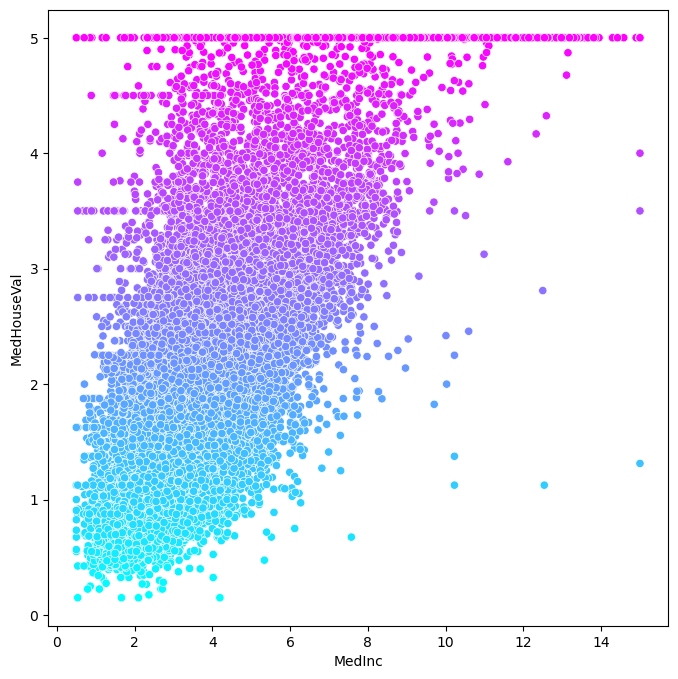

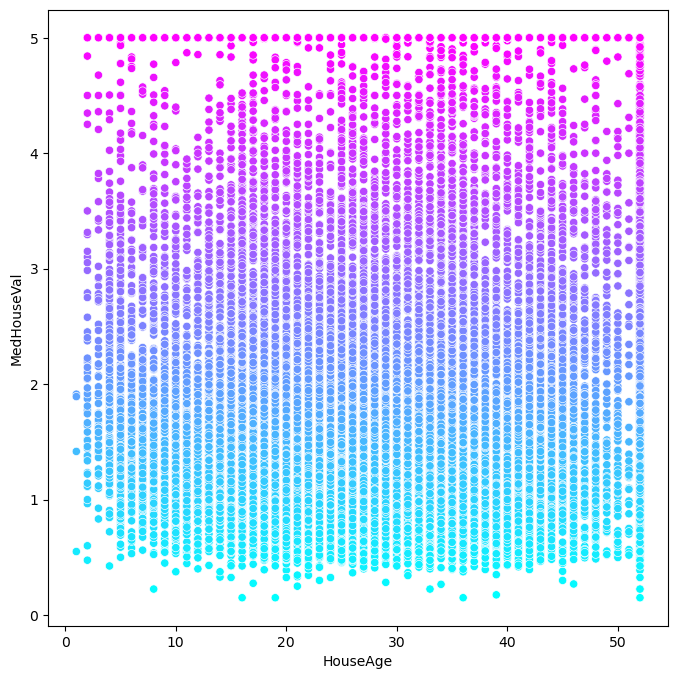

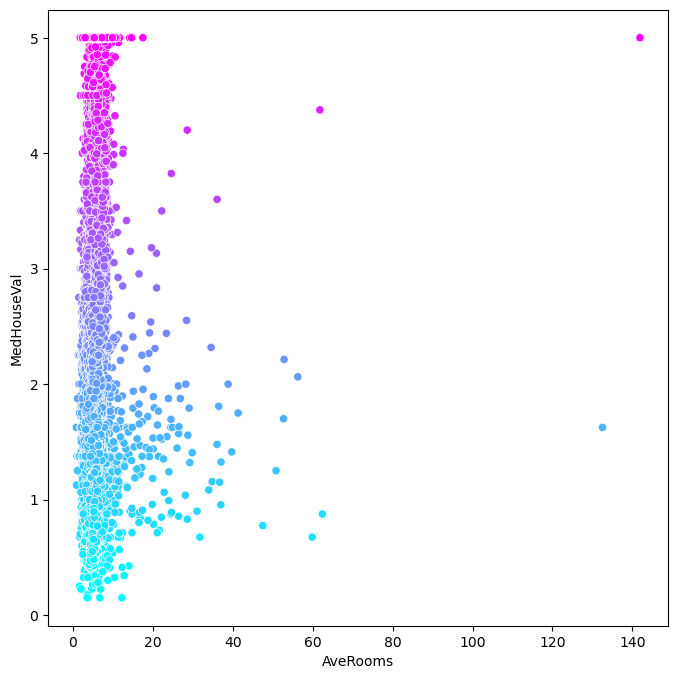

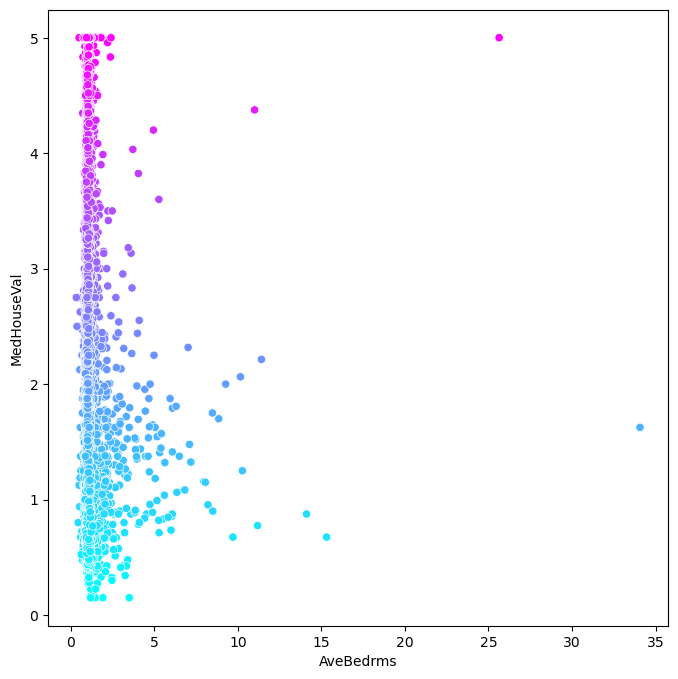

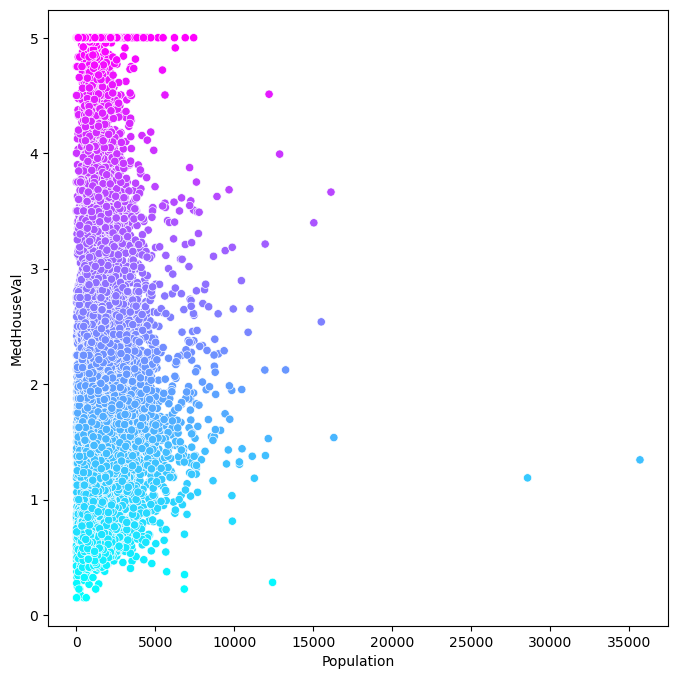

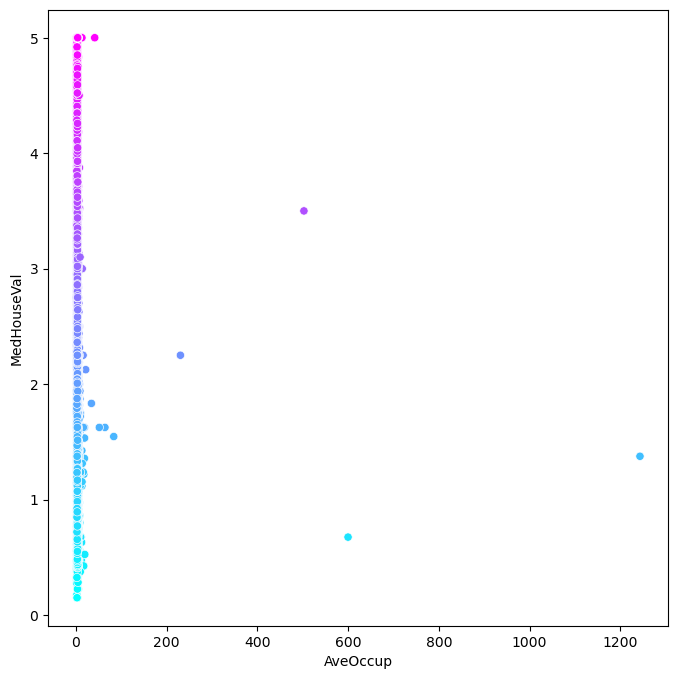

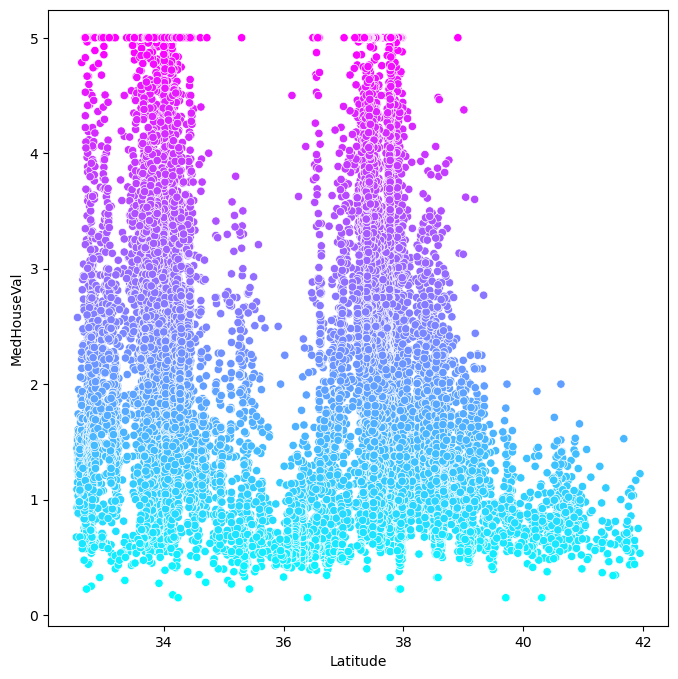

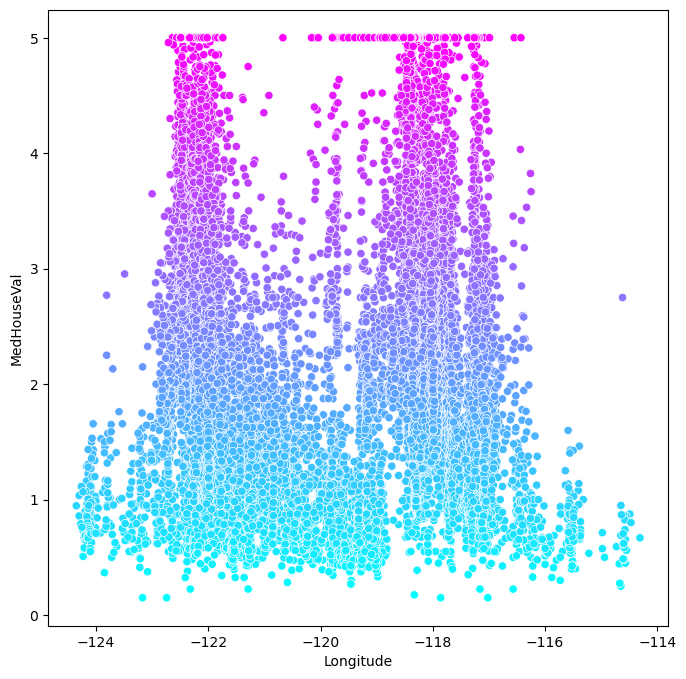

In [30]:
for feature in california.feature_names:
    fig = plt.figure(figsize=(8, 8))
    sns.scatterplot(california_df, x=feature, y='MedHouseVal', hue='MedHouseVal', palette='cool', legend=False)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
lr = LinearRegression()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=10, shuffle=True, test_size=0.25)

In [41]:
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [46]:
print(lr.intercept_)

-37.89883514628241


In [53]:
for i, name in enumerate(california.feature_names):
    print(f'{name:<12}: {lr.coef_[i]}')

MedInc      : 0.44383633154657137
HouseAge    : 0.009736270523982531
AveRooms    : -0.11781016044207894
AveBedrms   : 0.7796387488047105
Population  : 3.4655656653617846e-07
AveOccup    : -0.004516079382969238
Latitude    : -0.43129534030886313
Longitude   : -0.44440725582256757


In [61]:
expected = y_test
predicted = lr.predict(X_test)

print(f'Expected : {expected[:10]}\n')
print(f'Predicted : {predicted[:10]}')

Expected : [1.674 3.541 1.602 1.408 1.078 1.188 1.549 2.081 0.923 4.04 ]

Predicted : [3.01284996 2.58861737 2.35730549 1.71383885 1.74618215 0.75756234
 2.17713383 2.26129511 1.1841784  3.39951198]


In [62]:
from sklearn import metrics

In [66]:
mse = metrics.mean_squared_error(expected, predicted)
print(f'MSE : {mse:.4f}')

MSE : 0.5579


In [68]:
r2 = metrics.r2_score(expected, predicted)
print(f'R Square : {r2:.4f}')

R Square : 0.5859


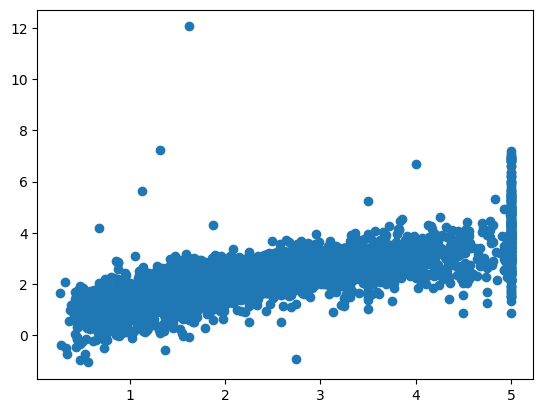

In [70]:
plt.scatter(expected, predicted)
plt.show()

In [71]:
import pandas as pd

In [72]:
epdf = pd.DataFrame()

In [74]:
epdf['Expected'] = pd.Series(expected)
epdf['Predicted'] = pd.Series(predicted)

In [77]:
epdf

,Expected,Predicted
0,1.674,3.0128
1,3.541,2.5886
2,1.602,2.3573
3,1.408,1.7138
4,1.078,1.7462
...,...,...
5155,4.385,4.0902
5156,0.600,1.1873
5157,1.932,1.6227
5158,1.805,1.1183


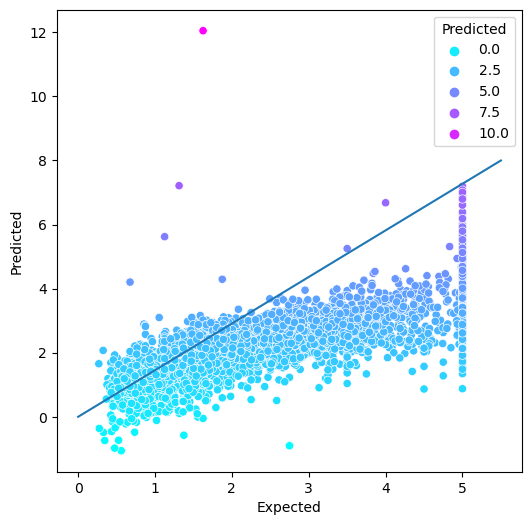

In [88]:
fig = plt.figure(figsize=(6, 6))
axes = sns.scatterplot(data=epdf, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=True)
plt.plot([0,5.5], [0,8], '-')    # Used for the tracing line in the graph

In [89]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [90]:
en = ElasticNet()
ls = Lasso()
rd = Ridge()

In [92]:
estimators = {'LR' : lr, 'EN' : en, 'LASSO' : ls, 'RIDGE' : rd}
# estimators = estimators.items()

In [93]:
from sklearn.model_selection import KFold, cross_val_score

In [94]:
kfold = KFold(n_splits=10, random_state=10, shuffle=True)

In [113]:
accuracy = 0
best = ''
for name, estimator in estimators.items():
    scores = cross_val_score(estimator=estimator, X=california.data, y=california.target, cv=kfold, scoring='r2')
    if scores.mean() > accuracy:
        best, accuracy = name, scores.mean()
    print(f'{name:<10} : {scores.mean()*100:.3f}%')

print(f'\nBest Model: {best} with accuracy {accuracy * 100:.3f}%')

LR         : 60.340%
EN         : 42.283%
LASSO      : 28.489%
RIDGE      : 60.340%

Best Model: RIDGE with accuracy 60.340%
